# Plot NetCDF files

Author: Elisa Bortoli (elisa.bortoli3@gmail.com)

Last review: 11/07/2019

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;
// to avoid output pictures into scrollable frames"

<IPython.core.display.Javascript object>

## Import ```netCDF4``` module

In [2]:
import netCDF4
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
import os
import numpy as np
import functools
import operator

# Data file
data = netCDF4.Dataset('FORCING_1993080106_2017080106_insitu.nc')

## Print headers

In [3]:
# Print variables
print("data.variables.keys() = ", data.variables.keys(), "\n")

data.variables.keys() =  odict_keys(['flag', 'time', 'LAT', 'LON', 'ZS', 'aspect', 'slope', 'ZREF', 'UREF', 'station', 'FORC_TIME_STEP', 'FRC_TIME_STP', 'Tair', 'Qair', 'Wind_DIR', 'Wind', 'Rainf', 'Snowf', 'LWdown', 'DIR_SWdown', 'SCA_SWdown', 'CO2air', 'PSurf', 'NEB', 'HUMREL', 'theorSW']) 



## Print number of elements

In [4]:
# Print dimensions
print("data.dimensions.keys() = ", data.dimensions.keys())
print("data.dimensions['time'] = \n", data.dimensions['time'])
print("data.dimensions['Number_of_points'] = \n", data.dimensions['Number_of_points'])

data.dimensions.keys() =  odict_keys(['time', 'Number_of_points'])
data.dimensions['time'] = 
 <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 210387

data.dimensions['Number_of_points'] = 
 <class 'netCDF4._netCDF4.Dimension'>: name = 'Number_of_points', size = 1



## Print [ variables['var'] ]

In [5]:
# Read the variables
time_s      = data.variables['time']
Rainf_kgm2s = data.variables['Rainf']
Wind_ms     = data.variables['Wind']
Wind_deg    = data.variables['Wind_DIR']
Tair_K      = data.variables['Tair']
SW_Wm2      = data.variables['theorSW']
LW_Wm2      = data.variables['LWdown']
RH_percent  = data.variables['HUMREL']

## Manipulate variables values

In [6]:
Tair_C = Tair_K[:]-273.15
Rainf_mmh = Rainf_kgm2s[:]*3600


## Convert the variable "time" in ```numpy.ndarray```

In [7]:
# Convert times
datetime = netCDF4.num2date(time_s[:],time_s.units)

print("type(time_s)   = ", type(time_s))
print("type(datetime) = ", type(datetime))

type(time_s)   =  <class 'netCDF4._netCDF4.Variable'>
type(datetime) =  <class 'numpy.ndarray'>


In [8]:
start = netCDF4.num2date(time_s[0],time_s.units)
stop = netCDF4.num2date(time_s[-1],time_s.units)

print("start = ", start)
print("stop  = ", stop)
print(" ----------------------------------------------------------------------------------------------")
print("type(start) = ", type(start))
print("type(start) = ", type(start))

start =  1993-08-01 06:00:00
stop  =  2017-08-01 06:00:00
 ----------------------------------------------------------------------------------------------
type(start) =  <class 'cftime._cftime.real_datetime'>
type(start) =  <class 'cftime._cftime.real_datetime'>


## Convert times from ```numpy.ndarray``` to ```pandas.core.frame.DataFrame```

In [9]:
pd_datetime = pd.DataFrame({'date':datetime[:]})
print("type(pd_datetime) = ", type(pd_datetime), "\n")
print("pd_datetime.index = ", pd_datetime.index, "\n")
print(" ----------------------------------------------------------------------------------------------- ")
print("pd_datetime.values[0:3] = \n", pd_datetime.values[0:3], "\n")
print("pd_datetime[0:3] = \n", pd_datetime[0:3], "\n")
print("pd_datetime.head() = ", pd_datetime.head())

type(pd_datetime) =  <class 'pandas.core.frame.DataFrame'> 

pd_datetime.index =  RangeIndex(start=0, stop=210387, step=1) 

 ----------------------------------------------------------------------------------------------- 
pd_datetime.values[0:3] = 
 [['1993-08-01T06:00:00.000000000']
 ['1993-08-01T07:00:00.000000000']
 ['1993-08-01T08:00:00.000013000']] 

pd_datetime[0:3] = 
                         date
0 1993-08-01 06:00:00.000000
1 1993-08-01 07:00:00.000000
2 1993-08-01 08:00:00.000013 

pd_datetime.head() =                          date
0 1993-08-01 06:00:00.000000
1 1993-08-01 07:00:00.000000
2 1993-08-01 08:00:00.000013
3 1993-08-01 09:00:00.000000
4 1993-08-01 10:00:00.000000


## Select only time data referred to years 2001-2011

In [10]:
# Find begin and start indexes
begin_2001 = pd_datetime.date[pd_datetime.date == '2001-01-01 00:00:00.000000'].index.tolist()
end_2011   = pd_datetime.date[pd_datetime.date == '2011-12-31 23:00:00.000013'].index.tolist()

print("begin_2001 = ", begin_2001)
print("end_2011   = ", end_2011)
print("end-begin  = ", end_2011[0]-begin_2001[0]+1)

begin_2001 =  [65034]
end_2011   =  [161441]
end-begin  =  96408


In [11]:
# Print head() and tail()
pd_datetime_2001_2011 = pd_datetime.loc[(pd_datetime['date'].dt.year >= 2001) 
                                        & (pd_datetime['date'].dt.year <= 2011)]
print("len(pd_datetime_2001_2011) = ", len(pd_datetime_2001_2011))

len(pd_datetime_2001_2011) =  96408


## Plot only data referred to year 2001-2011

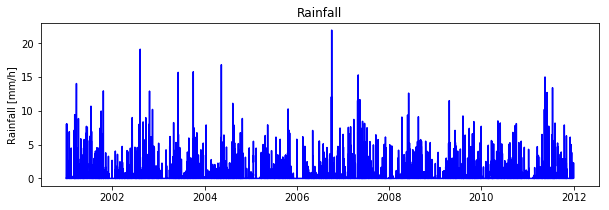

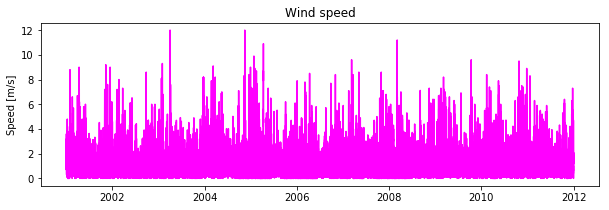

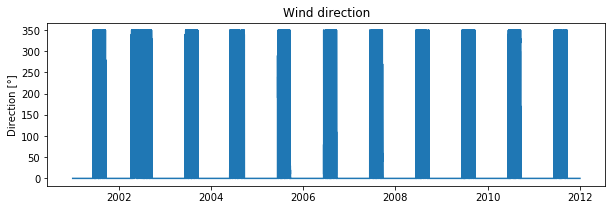

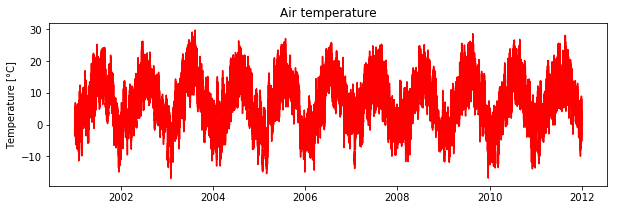

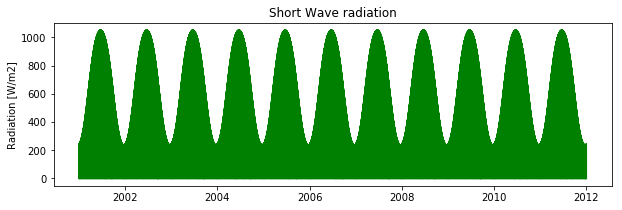

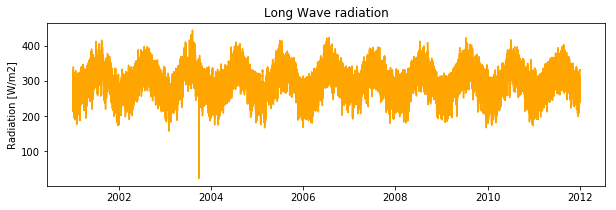

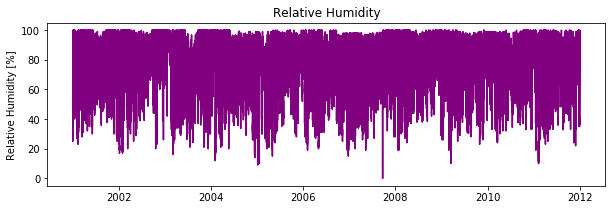

In [12]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.plot(pd_datetime_2001_2011, Rainf_mmh[begin_2001[0]:end_2011[0]+1], color = 'blue')
plt.title("Rainfall")
plt.ylabel("Rainfall [mm/h]")
plt.savefig(os.path.join(os.getcwd(), "rainfall.png"))
plt.show()

fig, ax = plt.subplots(figsize=(10, 3))
plt.plot(pd_datetime_2001_2011, Wind_ms[begin_2001[0]:end_2011[0]+1], color = 'magenta')
plt.title("Wind speed")
plt.ylabel("Speed [m/s]")
plt.savefig(os.path.join(os.getcwd(), "wind_speed.png"))
plt.show()

fig, ax = plt.subplots(figsize=(10, 3))
plt.plot(pd_datetime_2001_2011, Wind_deg[begin_2001[0]:end_2011[0]+1])
plt.title("Wind direction")
plt.ylabel("Direction [°]")
plt.savefig(os.path.join(os.getcwd(), "wind_direction.png"))
plt.show()

fig, ax = plt.subplots(figsize=(10, 3))
plt.plot(pd_datetime_2001_2011, Tair_C[begin_2001[0]:end_2011[0]+1], color = 'red')
plt.title("Air temperature")
plt.ylabel("Temperature [°C]")
plt.savefig(os.path.join(os.getcwd(), "air_temperature.png"))
plt.show()

fig, ax = plt.subplots(figsize=(10, 3))
plt.plot(pd_datetime_2001_2011, SW_Wm2[begin_2001[0]:end_2011[0]+1], color = 'green')
plt.title("Short Wave radiation")
plt.ylabel("Radiation [W/m2]")
plt.savefig(os.path.join(os.getcwd(), "sw_radiation.png"))
plt.show()

fig, ax = plt.subplots(figsize=(10, 3))
plt.plot(pd_datetime_2001_2011, LW_Wm2[begin_2001[0]:end_2011[0]+1], color = 'orange')
plt.title("Long Wave radiation")
plt.ylabel("Radiation [W/m2]")
plt.savefig(os.path.join(os.getcwd(), "lw_radiation.png"))
plt.show()

fig, ax = plt.subplots(figsize=(10, 3))
plt.plot(pd_datetime_2001_2011, RH_percent[begin_2001[0]:end_2011[0]+1], color = 'purple')
plt.title("Relative Humidity")
plt.ylabel("Relative Humidity [%]")
plt.savefig(os.path.join(os.getcwd(), "rh.png"))
plt.show()

## Save data into variables

In [13]:
Rainf_mmh_2001_2011  = Rainf_mmh[begin_2001[0]:end_2011[0]+1]
Wind_ms_2001_2011    = Wind_ms[begin_2001[0]:end_2011[0]+1]
Wind_deg_2001_2011   = Wind_deg[begin_2001[0]:end_2011[0]+1]
Tair_C_2001_2011     = Tair_C[begin_2001[0]:end_2011[0]+1]
SW_Wm2_2001_2011     = SW_Wm2[begin_2001[0]:end_2011[0]+1]
LW_Wm2_2001_2011     = LW_Wm2[begin_2001[0]:end_2011[0]+1]
RH_percent_2001_2011 = RH_percent[begin_2001[0]:end_2011[0]+1]

# print("pd_datetime_2001_2011 = \n", pd_datetime_2001_2011, "\n")
# print("Rainf_mmh_2001_2011 = \n", Rainf_mmh_2001_2011)
# print(" ----------------------------------------------------------------------------------------------")
# print("len(pd_datetime_2001_2011) = \n", len(pd_datetime_2001_2011), "\n")
# print("len(Rainf_mmh_2001_2011) = \n", len(Rainf_mmh_2001_2011))
# print(" ----------------------------------------------------------------------------------------------")
# print("type(pd_datetime_2001_2011) = ", type(pd_datetime_2001_2011))
# print("type(Rainf_mmh_2001_2011)   = ", type(Rainf_mmh_2001_2011))
# print(" ----------------------------------------------------------------------------------------------")
# print("pd_datetime_2001_2011.index = \n", pd_datetime_2001_2011.index, "\n") 
# print("pd_datetime_2001_2011.values = ", pd_datetime_2001_2011.values)
# print(" ----------------------------------------------------------------------------------------------")
# print("type(pd_datetime_2001_2011.index)  = ", type(pd_datetime_2001_2011.index))
# print("type(pd_datetime_2001_2011.values) = ", type(pd_datetime_2001_2011.values))

## Convert time and variable to ```numpy.ndarray```
### datetime
- previously a ```pandas.core.frame.DataFrame```

### variable
- previously a ```numpy.ma.core.MaskedArray```

In [14]:
pd_datetime_2001_2011 = np.array(pd_datetime_2001_2011)
Rainf_mmh_2001_2011   = np.array(Rainf_mmh_2001_2011)
Wind_ms_2001_2011     = np.array(Wind_ms_2001_2011)
Wind_deg_2001_2011    = np.array(Wind_deg_2001_2011)
Tair_C_2001_2011      = np.array(Tair_C_2001_2011)
SW_Wm2_2001_2011      = np.array(SW_Wm2_2001_2011)
LW_Wm2_2001_2011      = np.array(LW_Wm2_2001_2011)
RH_percent_2001_2011  = np.array(RH_percent_2001_2011)

# print(pd_datetime_2001_2011, "\n")
# print(Rainf_mmh_2001_2011, "\n")

# print("type(pd_datetime_2001_2011) = ", type(pd_datetime_2001_2011), "\n")
# print("type(Rainf_mmh_2001_2011)   = ",type(Rainf_mmh_2001_2011), "\n")

# print("len(pd_datetime_2001_2011) = ", len(pd_datetime_2001_2011), "\n")
# print("len(Rainf_mmh_2001_2011)   = ",len(Rainf_mmh_2001_2011), "\n")

## Collapse nested lists in one for each variable

In [15]:
list_time    = functools.reduce(operator.iconcat, pd_datetime_2001_2011, [])
list_rain    = functools.reduce(operator.iconcat, Rainf_mmh_2001_2011, [])
list_windsp  = functools.reduce(operator.iconcat, Wind_ms_2001_2011, [])
list_winddir = functools.reduce(operator.iconcat, Wind_deg_2001_2011, [])
list_tair    = functools.reduce(operator.iconcat, Tair_C_2001_2011, [])
list_SW      = functools.reduce(operator.iconcat, SW_Wm2_2001_2011, [])
list_LW      = functools.reduce(operator.iconcat, LW_Wm2_2001_2011, [])
list_RH      = functools.reduce(operator.iconcat, RH_percent_2001_2011, [])

## Change time format and organize data to be ready for GEOtop

In [16]:
list_time = pd.to_datetime(list_time, format = "%Y-%m-%d %H:%M:%S.%f")
list_time = list_time.strftime("%d/%m/%Y %H:%M")

In [17]:
dataset = pd.DataFrame({'Date': list_time, 'Prec': list_rain, 'Ws': list_windsp, 'Wd': list_winddir, 
                        'Tair': list_tair, 'SW': list_SW, 'LW': list_LW, 'RH':list_RH},
                       columns =['Date','Prec','Ws','Wd','Tair','SW','LW','RH'])
dataset.head()

,Date,Prec,Ws,Wd,Tair,SW,LW,RH
0,01/01/2001 00:00,0.0,0.8,0.0,-3.5,0.0,213.6,48.0
1,01/01/2001 01:00,0.0,1.1,0.0,-3.3,0.0,227.8,68.0
2,01/01/2001 02:00,0.0,1.0,0.0,-2.8,0.0,262.2,48.0
3,01/01/2001 03:00,0.0,0.8,0.0,-3.2,0.0,225.8,57.0
4,01/01/2001 04:00,0.0,0.7,0.0,-2.3,0.0,233.9,46.0


## Save output to file

In [1]:
save_2001_2011 = dataset.to_csv(os.getcwd() +"/meteo_2001_2011.csv", sep=',',index=False)

NameError: name 'dataset' is not defined